## Introduction

The datset includes the listing activity of and metrics in NYC, for 2019. This dataset contains prices for listing in different neighborhood groups within different neighborhood cities. It also contains different factors like property types, reviews, and availability of listings, that can affect the price for the listing. The data has 48895 obsevations and 16 attributes. Response variable: Price per night.

Dataset is available on Airbnb: http://insideairbnb.com/get-the-data.html and can be downloaded from : https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data.  Data has- 48895 distinct observations and 16 distinct variables. 

Explanatory variables: price, name, host id, host name, Neighborhood-group, neighborhood, latitude, longitude, room-type, minimum-nights, number of reviews, last review, review per month, calculated host listings, and availability 365 days.

In [123]:
#Imports
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [103]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
import warnings

plt.style.use('ggplot')
plt.tight_layout()

warnings.filterwarnings('ignore')

<Figure size 432x288 with 0 Axes>

## Import NYC Airbnb Dataset

In [83]:
df = pd.read_csv('AB_NYC_2019.csv')

## Basic Data Exploration

In [68]:
# Count of rows and columns in the dataset
df.shape
# check the basic information about the dataset
df.info()
# Check top rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [30]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [31]:
import missingno as msno

## Check missing Value in the Dataset

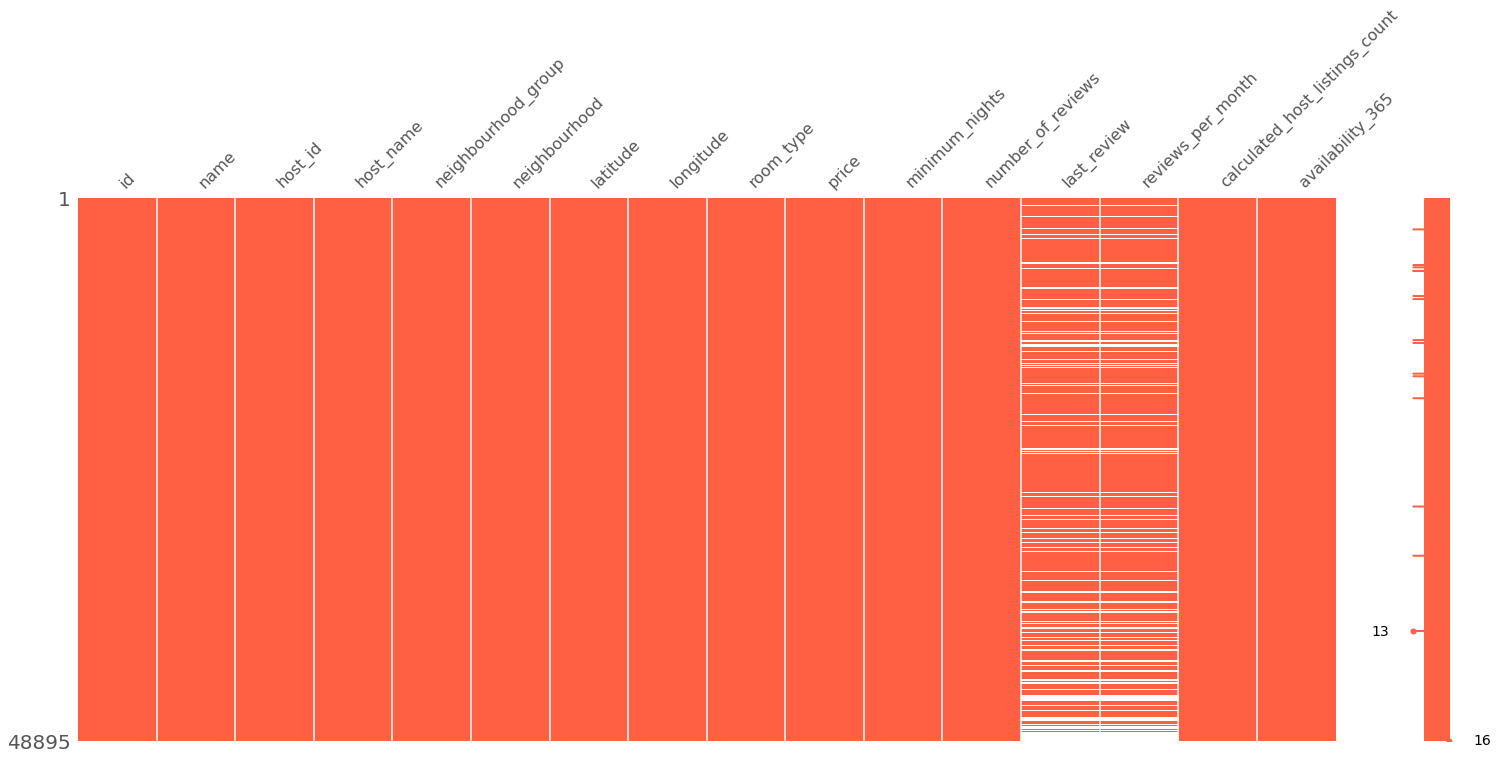

In [35]:
msno.matrix(df,color=(1, 0.38, 0.27))

First, we checked the summary statistics of the data and then we checked missing values and we found large missing value in last_review and reviews_per_month. We will remove these variable.

In [84]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [86]:
#Remove columns with Null value
df.drop(['name','host_name','last_review','reviews_per_month'], axis=1, inplace=True)

We have 4 columns contain a missing value. Now, we drop unnecessary columns such as id, name, host_name, last_review.

In [87]:
df.isnull().sum()


id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Exploration Data and Visualizing

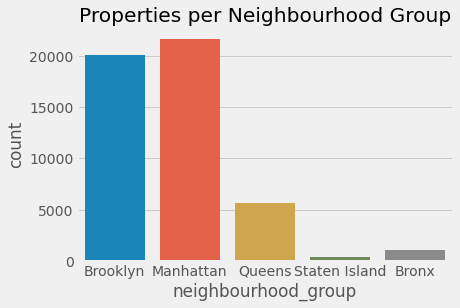

In [92]:

title = 'Properties per Room Type'
sns.countplot(df['room_type'])
plt.title(title)
plt.ioff()

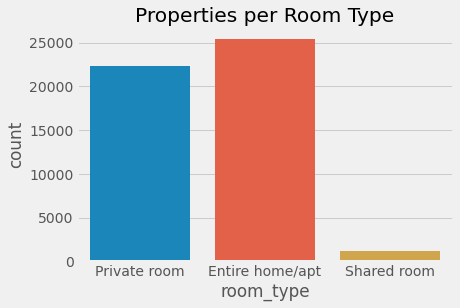

In [93]:
title = 'Properties per Neighbourhood Group'
sns.countplot(df['neighbourhood_group'])
plt.title(title)
plt.ioff()

 In the above 1st graph, we see Entire home/apt have higher average price that can conclude private room and shared have low average price for per night. In the 2nd graph, property is distributed in neighborhood groups.

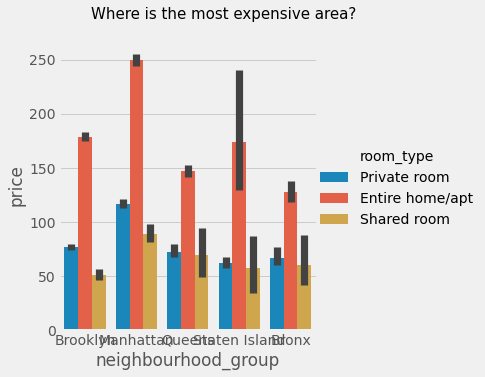

In [97]:

# Price according to different room_type in different areas
fig2 = sns.catplot(x='neighbourhood_group',y='price',data=df,kind='bar',hue='room_type')
fig2.fig.suptitle('Where is the most expensive area?',fontsize=15,y=1.05)
fig2.savefig('price_area.png', bbox_inches = 'tight')

The above graph can tell us about price for each property types in neighborhood groups. Manhattan is the most expensive neighborhood in between all. Shared room type property has lowest price per night as compare to other property types.

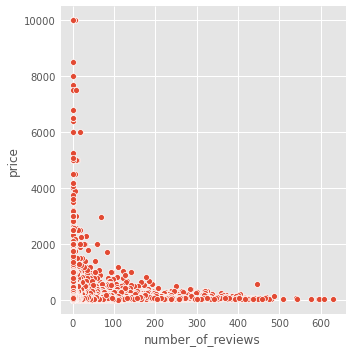

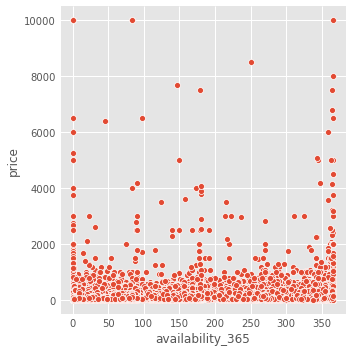

In [108]:
sns.relplot(x="number_of_reviews", y="price", data=df)
sns.relplot(x="availability_365", y="price", data=df)



listings have higher number of reviews and high price listings have low number of reviews. That shows a negative relationship. 

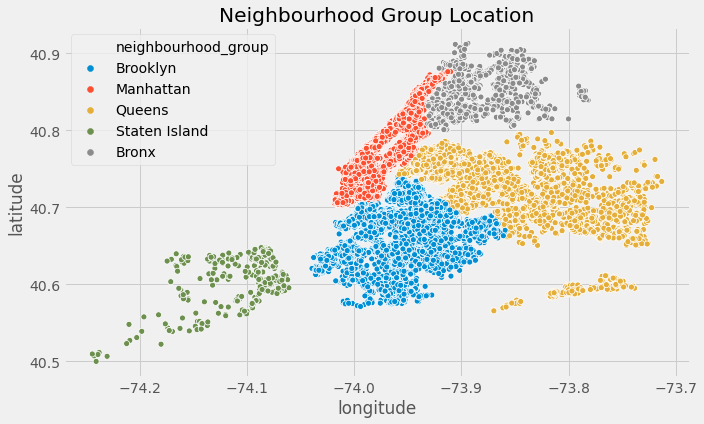

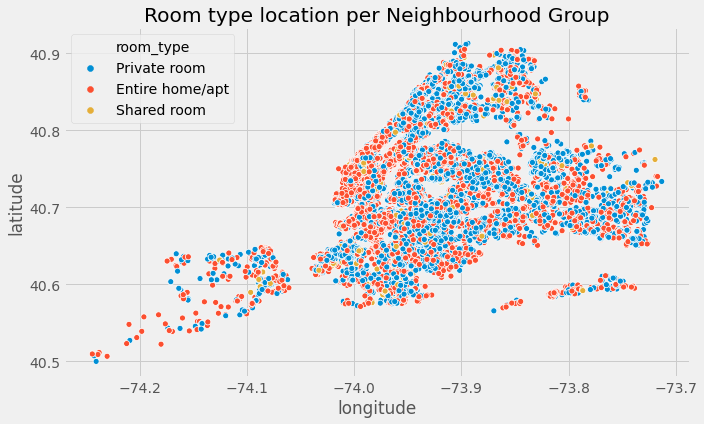

In [95]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group).set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type).set_title(title)
plt.ioff()

The above map represents pricing in the city. We can see mostly area are in low to medium price range (red to yellow). Green indicates most expensive area and we can find few green areas which means city has less expensive property than average price.

## Conclusion

This Airbnb ('AB_NYC_2  For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. 019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented.  For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. 